In [1]:
!pip install pylatexenc qiskit[visualization] qiskit_aer qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

# **Zadanie Projektowe**

## **Kwantowe Systemy Teleinformatyki, sezon 2024-2025**

W tekście poniżej znajdziesz prezentację protokołu teleportacji kwantowej korzystającego z pary EPR $\ket{\beta_{0,0}}$. Ostatni z przykładów (punkt 0.4) demonstruje poprawność wykonania protokołu za pomocą symulatora `Aer`.

Zadanie projektowe polega na uzupełnieniu demonstracji o następujące elementy:
1. Konstrukcji obwodów teleportacji korzystających z par $\beta_{0,1}$, $\beta_{1,0}$, $\beta_{1,1}$.
2. Analizy poprawności skonstruowanych obwodów przy pomocy symulatora Aer.
3. Przeprowadzeniu analizy poprawności realizacji na rzeczywistym komputerze kwantowym.
4. Wyciągnięciu wniosków z uzyskanych wyników.

Szczegółowe instrukcje osiągania kolejnych kamieni milowych znajdziesz w punktach 1, 2, 3 i 4 niniejszego notatnika.

Rozliczenie projektu jest dwuetapowe. Nonatnik z rozwiązaniem zadania projektowego należy wgrać na PZE, a następnie umówić się na jego obronę korzystając ze [Strony rezerwacji terminów spotkań](https://outlook.office.com/bookwithme/user/145e8004551345cd9a9378e785878a3d@polsl.pl?anonymous&ep=plink). Po obronie wystawiana jest ocena z projektu.

## **0. Protokół Teleportacji Kwantowej**

### **0.1 Założenia protokołu**

Teleportacja kwantowa to protokół, który umożliwia przesłanie *nieznanego stanu kwantowego* z jednej strony (Alice) do drugiej (Bob), *bez fizycznego przesyłania kubitu*. W tym procesie wykorzystywane są zasoby splątania kwantowego oraz klasyczna komunikacja.  

W tym scenariuszu wprowadzamy zaufaną trzecią stronę – **Trenta**, który przygotowuje i rozdziela *splątaną parę kubitów (parę EPR)* pomiędzy Alice i Boba.

**Założenia:**

1. Trent generuje parę splątanych kubitów $|\beta_{00}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.
2. Kubit A (z tej pary) trafia do Alice, a kubit B – do Boba.
3. Alice posiada dodatkowy kubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, którego stan chce przekazać Bobowi.
4. Alice i Bob **mogą komunikować się tylko klasycznie** (np. za pomocą telefonu).
5. Alice **nie zna** stanu $|\psi\rangle$ – nie może go więc po prostu skopiować.

### **Spodziewany efekt**

Po zakończeniu protokołu:

- **Kubit Boba** (ten z pary EPR) znajduje się **dokładnie w stanie** $|\psi\rangle$, który wcześniej miała Alice.
- **Oryginalny kubit Alice** nie zawiera już informacji o $|\psi\rangle$ – teleportacja nie oznacza duplikacji.
- Stan został przeniesiony **bez przesyłania fizycznego nośnika kwantowego**, a jedynie przy pomocy klasycznych bitów i wcześniej przygotowanego splątania.

### **Kroki protokołu teleportacji kwantowej**

**Oznaczenia:**
- $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ – stan do teleportacji (na kubicie `Q0`).
- $|\beta_{0,0}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ – para EPR (kubit `Q1` u Alice, `Q2` u Boba).

#### Krok 1: Generacja pary EPR przez Trenta
- Trent przygotowuje splątany stan dwóch kubitów $|\Phi^+\rangle$.
- Wysyła jeden z kubitów (A) do Alice i drugi (B) do Boba.

#### Krok 2: Alice łączy stan wejściowy z kubitem EPR
- Alice ma dwa kubity:
  - `Q0`: stan $|\psi\rangle$
  - `Q1`: kubit A pary EPR
- Alice wykonuje:
  1. bramkę **CNOT(Q0 -> Q1)**,
  2. bramkę **Hadamard na Q0**.

#### Krok 3: Pomiar i klasyczna transmisja
- Alice **mierzy** kubity Q0 i Q1 w bazie obliczeniowej (|0⟩, |1⟩).
- Otrzymuje wynik dwóch klasycznych bitów: $b_0, b_1 \in \{0,1\}$.
- Wysyła te dwa bity do Boba klasycznym kanałem.

#### Krok 4: Korekcja u Boba
- Bob, po otrzymaniu bitów od Alice:
  - jeśli $b_1 = 1$, stosuje bramkę **X**,
  - jeśli $b_0 = 1$, stosuje bramkę **Z**.
- Po tych operacjach jego kubit (Q2) przyjmuje stan dokładnie $|\psi\rangle$.

---

Teleportacja kwantowa pozwala "przenieść" nieznany stan kwantowy z jednego miejsca do drugiego, **bez kopiowania** i **bez fizycznego przenoszenia cząstki**, ale przy wykorzystaniu wcześniej rozdzielonego splątania i klasycznej komunikacji.

Zaufana strona (Trent) może działać jako inicjator systemu – zapewniając wiarygodną i jednoczesną dystrybucję pary EPR do uczestników, co czyni cały protokół bardziej realistycznym w kontekście sieci kwantowych lub przyszłego "kwantowego internetu".

---

### **Dlaczego to działa?**

#### **Pary EPR**

$$
\ket{\Phi^+_\mathrm{A B}} =
\ket{\beta_{00}} =
\mathbf{CX}_\mathrm{A B}\mathbf{H}_\mathrm{A} \ket{0_\mathrm{A}}\ket{0_\mathrm{B}}  = \frac{\ket{0_\mathrm{A}}\ket{0_\mathrm{B}}+\ket{1_\mathrm{A}}\ket{1_\mathrm{B}}}{\sqrt{2}} =
\frac{\ket{+_\mathrm{A}}\ket{+_\mathrm{B}}+\ket{-_\mathrm{A}}\ket{-_\mathrm{B}}}{\sqrt{2}}
$$
$$
\ket{\Psi^+_\mathrm{A B}} =
\ket{\beta_{01}} =
\mathbf{CX}_\mathrm{A B}\mathbf{H}_\mathrm{A} \ket{0_\mathrm{A}}\ket{1_\mathrm{B}}
= \frac{\ket{0_\mathrm{A}}\ket{1_\mathrm{B}}+\ket{1_\mathrm{A}}\ket{0_\mathrm{B}}}{\sqrt{2}} =
\frac{\ket{+_\mathrm{A}}\ket{+_\mathrm{B}}-\ket{-_\mathrm{A}}\ket{-_\mathrm{B}}}{\sqrt{2}}
$$
$$
\ket{\Phi^-_\mathrm{A B}} =
\ket{\beta_{10}} =
\mathbf{CX}_\mathrm{A B}\mathbf{H}_\mathrm{A} \ket{1_\mathrm{A}}\ket{0_\mathrm{B}}
= \frac{\ket{0_\mathrm{A}}\ket{0_\mathrm{B}}-\ket{1_\mathrm{A}}\ket{1_\mathrm{B}}}{\sqrt{2}} =
\frac{\ket{+_\mathrm{A}}\ket{-_\mathrm{B}}+\ket{-_\mathrm{A}}\ket{+_\mathrm{B}}}{\sqrt{2}}
$$
$$
\ket{\Psi^-_\mathrm{A B}} =
\ket{\beta_{11}} =
\mathbf{CX}_\mathrm{A B}\mathbf{H}_\mathrm{A} \ket{1_\mathrm{A}}\ket{1_\mathrm{B}}
= \frac{\ket{0_\mathrm{A}}\ket{1_\mathrm{B}}-\ket{1_\mathrm{A}}\ket{0_\mathrm{B}}}{\sqrt{2}} =
\frac{\ket{-_\mathrm{A}}\ket{+_\mathrm{B}}-\ket{+_\mathrm{A}}\ket{-_\mathrm{B}}}{\sqrt{2}}
$$

#### **Analiza stanu rejestrów**

$$
\ket{\psi}_{A^\prime}\ket{\Phi^{+}_{AB}}=\left(\alpha_0\ket{0_{A^\prime}}+\alpha_1\ket{1_{A^\prime}}\right)
\frac{1}{\sqrt{2}}\left(\ket{0_A}\ket{0_B}+\ket{1_A}\ket{1_B}\right)
=\frac{1}{\sqrt{2}}\left(
\alpha_0\ket{0_{A^\prime}}\ket{0_A}\ket{0_B}+\alpha_0\ket{0_{A^\prime}}\ket{1_A}\ket{1_B}+
\alpha_1\ket{1_{A^\prime}}\ket{0_A}\ket{0_B} + \alpha_1\ket{1_{A^\prime}}\ket{1_A}\ket{1_B}
\right)
= $$
$$ =
\frac{1}{2}\left[
 \alpha_0\ket{0_B}\left(\ket{\beta_{0,0}}_{A^\prime A}+\ket{\beta_{1,0}}_{A^\prime A}\right)
+\alpha_0\ket{1_B}\left(\ket{\beta_{0,1}}_{A^\prime A}+\ket{\beta_{1,1}}_{A^\prime A}\right)
% + \right. \\ \left.
+\alpha_1\ket{0_B}\left(\ket{\beta_{0,1}}_{A^\prime A}-\ket{\beta_{1,1}}_{A^\prime A}\right)
+\alpha_1\ket{1_B}\left(\ket{\beta_{0,0}}_{A^\prime A}-\ket{\beta_{1,0}}_{A^\prime A}\right)
\right]
= $$
$$
= \frac{1}{2}\left[
\ket{\beta_{0,0}}_{A^\prime A}\left(\alpha_0\ket{0_B}+\alpha_1\ket{1_B}\right)
+
\ket{\beta_{1,0}}_{A^\prime A}\left(\alpha_0\ket{0_B}-\alpha_1\ket{1_B}\right)
% + \right.\\ \left.
+
\ket{\beta_{0,1}}_{A^\prime A}\left(\alpha_0\ket{1_B}+\alpha_1\ket{0_B}\right)
+
\ket{\beta_{1,1}}_{A^\prime A}\left(\alpha_0\ket{1_B}-\alpha_1\ket{0_B}\right)
\right]
$$
Pomiar Bella wybiera z  p. $1/4$ jeden ze stanów $\Ket{\beta_{\mu,\nu}}$.
Wynik pomiaru (wartość $\mu$ i $\nu$) określa niezbędną transformację.

## **0.2 Prosta symulacja działania protokołu**

### Krok 0: Przygotowanie obwodu

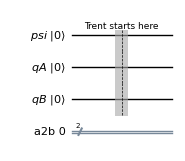

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

a2b = ClassicalRegister(2, 'a2b')
qc = QuantumCircuit(qpsi, qA, qB, a2b)
qc.barrier(label="Trent starts here")
qc.draw('mpl',scale=0.5,initial_state=True)

### Krok 1: Generacja pary EPR przez Trenta
- Trent przygotowuje splątany stan dwóch kubitów $|\beta_{0,0}\rangle$.
- Wysyła jeden z kubitów (A) do Alice i drugi (B) do Boba.

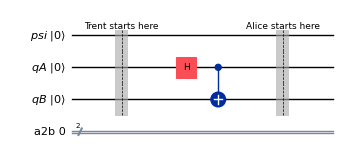

In [ ]:
qc.h(qA)
qc.cx(qA,qB)
qc.draw('mpl')
qc.barrier(label="Alice starts here")
qc.draw('mpl',scale=0.5,initial_state=True)

### Krok 2: Alice wykonuje pomiar Bell'a
- Alice ma dwa kubity:
  - Q0: stan $|\psi\rangle$
  - Q1: kubit A pary EPR
- Alice wykonuje Bell'a posiadanych:
  1. bramkę **CNOT(Q0 → Q1)**,
  2. bramkę **Hadamard na Q0**.
  - Alice **mierzy** kubity Q0 i Q1 w bazie obliczeniowej (|0⟩, |1⟩) i wynik umieszcza w bitach klasycznych b[0] i b[1]


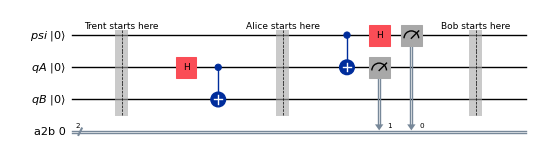

In [ ]:
qc.cx(qpsi, qA)
qc.h(qpsi)
qc.measure(qpsi, a2b[0])
qc.measure(qA, a2b[1])
qc.barrier(label="Bob starts here")
qc.draw('mpl',scale=0.5,initial_state=True)

### Krok 3: Klasyczna transmisja
- Wynikiem pomiaru są dwa klasyczne bity: $b_0, b_1 \in \{0,1\}$.
- Alice wysyła te dwa bity do Boba klasycznym kanałem.



#### Krok 4: Korekcja u Boba
- Bob, po otrzymaniu bitów od Alice:
  - jeśli $b_1 = 1$, stosuje bramkę **X** do swojego qubitu `Q2`,
  - jeśli $b_0 = 1$, stosuje bramkę **Z** do swojego qubitu `Q2`.
- Po tych operacjach jego kubit (`Q2`) przyjmuje stan $|\psi\rangle$, dokladnie ten sam, który Alice miała w rejestrze `Q0` przed rozpoczęciem protokołu.

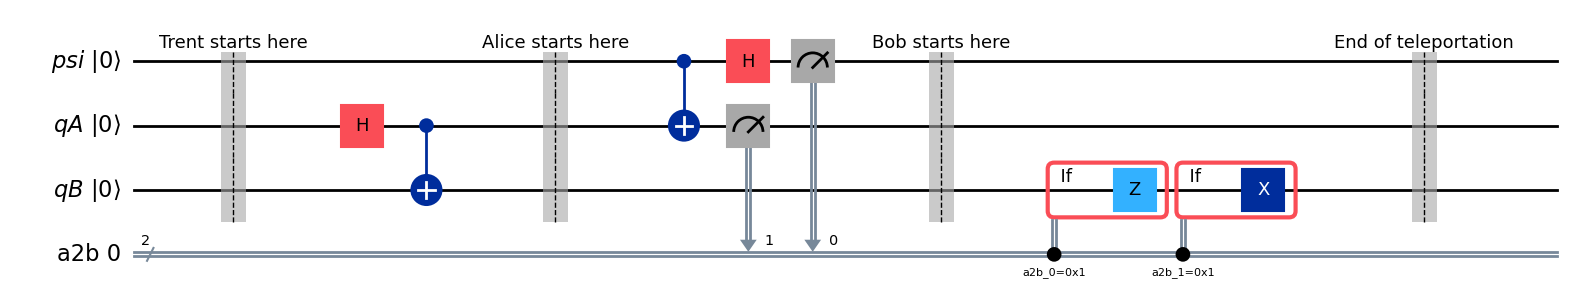

In [ ]:
with qc.if_test((a2b[0], 1)):
    qc.z(qB)
with qc.if_test((a2b[1], 1)):
    qc.x(qB)
qc.barrier(label="End of teleportation")
qc.draw('mpl',scale=1,initial_state=True)

### Proste sprawdzenie poprawności

Stan wejściowy to $\ket{0}$, zatem `SamplerV2` powinien zawsze wskazać 0.

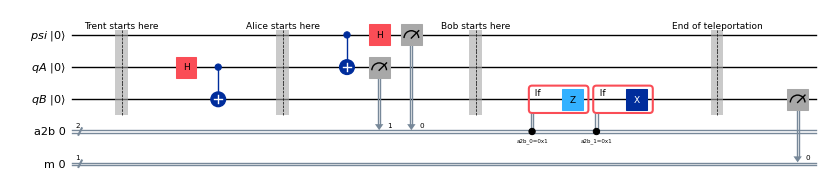

In [ ]:
m = ClassicalRegister(1, 'm')
# kopia obwodu teleportacji z dodanym pomiarem qB na m, aby spełnić wymogi Samplera.
sampler_circuit = qc.copy()
sampler_circuit.add_register(m)
sampler_circuit.measure(qB, m[0])
sampler_circuit.draw('mpl',scale=0.5,initial_state=True)

Symulacja działania obwodu. Używamy Aer i SamplerV2, aby mieć zgodność interfejsu z `qiskit_ibm_runtime`.

In [ ]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
backend = AerSimulator()
sampler_aer = AerSampler()
job_aer=sampler_aer.run([sampler_circuit], shots=1000)
result_aer=job_aer.result()

Wizualizacja otrzymanych wyników. Na histogramie wszystkie wyniki pomiarów powinny być skupione wokół `0`.

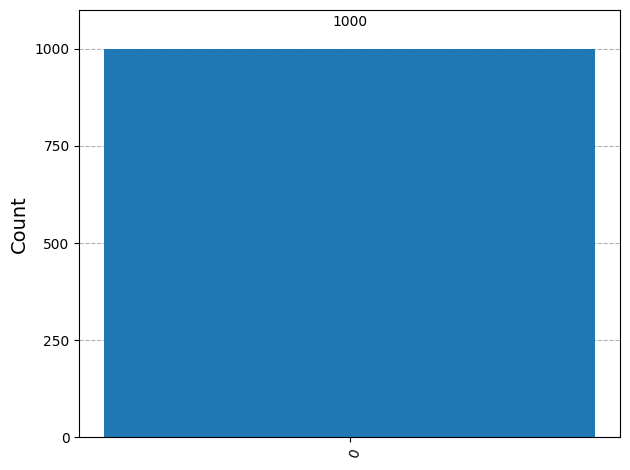

In [ ]:
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.m.get_counts()
plot_histogram(counts_aer)

## **0.3 Blokowe sformułowanie protokołu**

Procedury generacji pary EPR i identyfikacji jej typu

In [2]:
def bell_subcircuit(name="BellCircuit"):
    qc = QuantumCircuit(2, name=name)
    qc.h(0)
    qc.cx(0, 1)
    return qc.to_instruction()

def bell_measurement_subcircuit(name="BellMeasurementCircuit"):
    qc = QuantumCircuit(2, name=name)
    qc.cx(0, 1)
    qc.h(0)
    return qc.to_instruction()

Protokół przepisany przy ich użyciu

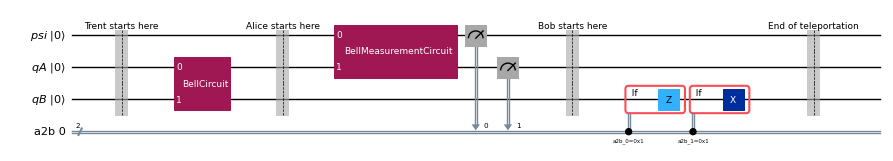

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

a2b = ClassicalRegister(2, 'a2b')
qc = QuantumCircuit(qpsi, qA, qB, a2b)
qc.barrier(label="Trent starts here")
qc.append(bell_gate, [qA, qB])
qc.barrier(label="Alice starts here")
qc.append(bell_measurement, [qpsi, qA])
qc.measure(qpsi, a2b[0])
qc.measure(qA, a2b[1])
qc.barrier(label="Bob starts here")
with qc.if_test((a2b[0], 1)):
    qc.z(qB)
with qc.if_test((a2b[1], 1)):
    qc.x(qB)
qc.barrier(label="End of teleportation")
qc.draw('mpl',scale=0.5,initial_state=True)

Sprawdzenie.

> **Uwaga!** Tym raze Aer wymaga transpilacji bo nie ma zaimplementowanych bramek `BellCircuit` i `BellMeasurementCircuit`.

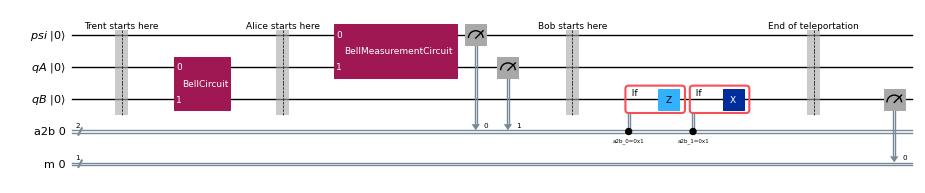

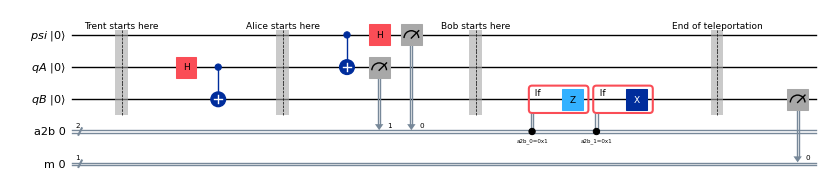

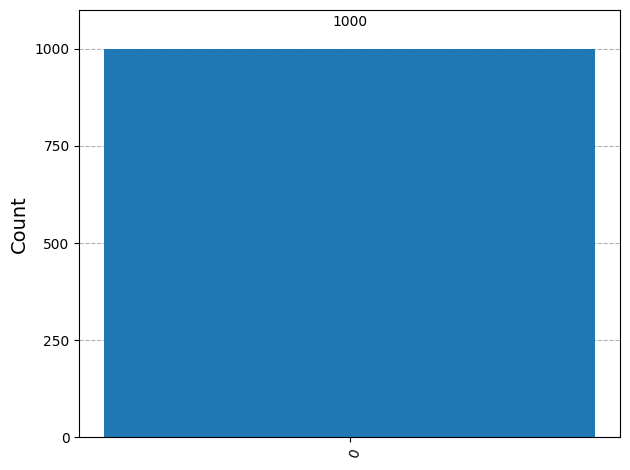

In [4]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import transpile
backend = AerSimulator()
sampler_aer = AerSampler()

m = ClassicalRegister(1, 'm')
sampler_circuit = qc.copy() ;
sampler_circuit.add_register(m)
sampler_circuit.measure(qB, m[0])

qc_aer = transpile(sampler_circuit, backend=backend)

job_aer=sampler_aer.run([qc_aer], shots=1000)
result_aer=job_aer.result()
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.m.get_counts()
display(sampler_circuit.draw('mpl',scale=0.5,initial_state=True,fold=-1))
display(qc_aer.draw('mpl',scale=0.5,initial_state=True))
display(plot_histogram(counts_aer))

## **0.4 Uogólnienie na dowolny stan wejściowy**

Dowolny stan wejściowy można uzyskać stosując przed teleportacją losową transformację unitarną do kubitu $\ket{\psi}$.
Za pomocą funkcji `random_unitary(2)` z modułu `qiskit.quantum_info` generujemy losową macierz 2×2 z rozkładem Haar'a (płaski rozkład wśród macierzy unitarnych). Następnie, przy użyciu klasy `OnekubitEulerDecomposer` dekomponujemy tę macierz do postaci parametrycznej $U3(\theta, \phi, \lambda)$. Teraz trójka parametrów $\theta$, $\phi$, $\lambda$ w pełni opisuje macierz, bowiem każdą macierz unitarną 2x2 da się sprowadzić do postaci

$$
U(\theta,\phi,\lambda) = \begin{pmatrix}
\cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\
e^{i\phi}\sin\frac{\theta}{2} & e^{i(\phi+\lambda)}\cos\frac{\theta}{2}
\end{pmatrix}
$$


Ta ogólna parametryczna postać transformacji unitarnej odpowiada bramce $U3(\theta,\phi,\lambda)$ stosowanej w Qiskit.

Po standardowej teleportacji aplikujemy na kubicie `qB` transformację odwrotną, czyli $U3(–θ, –λ, –φ)$. Jeśli teleportacja działa poprawnie, stan na `qB` powinien zostać przywrócony do $\ket{0}$, co potwierdzamy pomiarem.

> Dlaczego po prostu nie wygenerować losowej bramki korzystając z `random_untary`, a poźniej nie zastosować do niej operacji sprzężenia hermitowskiego. Po co dokonywać dekompozycji na parametry $\phi$,$\theta$,$\lambda$?

Oba podejścia są teoretycznie poprawne, jednak wybór dekompozycji do parametrów U3 jest podyktowany względami praktycznymi. Bramka $U3$ jest zwykle natywnie wspierana przez sprzętowe backendy IBM Quantum. Jeśli użyjemy bezpośrednio losowej bramki (jako ogólnej macierzy unitarnej) i jej sprzężenia hermitowskiego, to transpiler będzie musiał rozłożyć tę ogólną bramkę na natywne operacje. Dekompozycja do postaci U3 zapewnia, że obwód jest już zoptymalizowany pod kątem zestawu bramek efektywnie realizowalnych w sprzęcie.


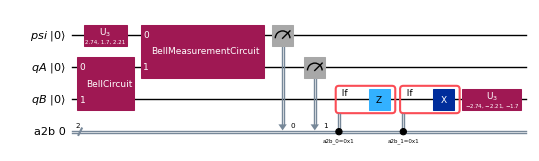

In [5]:
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import U3Gate
from qiskit.synthesis import OneQubitEulerDecomposer

# Generujemy losową macierz unarną dla jednego kubitu
rand_unitary = random_unitary(2)

# Używamy OnekubitEulerDecomposer do dekompozycji do postaci U3(θ, φ, λ)
decomposer = OneQubitEulerDecomposer(basis="U3")
theta_val, phi_val, lam_val = decomposer.angles(rand_unitary)
bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

a2b = ClassicalRegister(2, 'a2b')
qc00 = QuantumCircuit(qpsi, qA, qB, a2b)

# dowolny stan wejściowy
qc00.append(U3Gate(theta_val, phi_val, lam_val), [qpsi])
# para EPR wygenerowana przez Trenta
qc00.append(bell_gate, [qA, qB])
# teleportacja, część Alice
qc00.append(bell_measurement, [qpsi, qA])
qc00.measure(qpsi, a2b[0])
qc00.measure(qA, a2b[1])
# teleportacja, część Bob'a
with qc00.if_test((a2b[0], 1)):
    qc00.z(qB)
with qc00.if_test((a2b[1], 1)):
    qc00.x(qB)
# tu powinien być dowolny stan \psi=U3(θ, φ, λ)|0>.
# Stosujemy transformację odwrotną do U3(θ, φ, λ)
# (U3(θ, φ, λ))^(-1) = U3(-θ, -λ, -φ), zwróć uwagę na na zmianę znaków i kolejność argumentów
qc00.append(U3Gate(-theta_val, -lam_val, -phi_val), [qB])
qc00.draw('mpl',scale=0.5,initial_state=True)

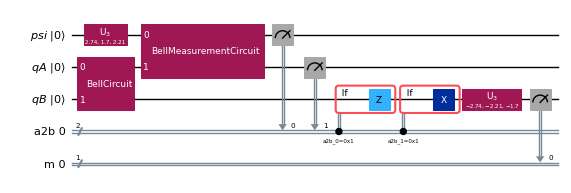

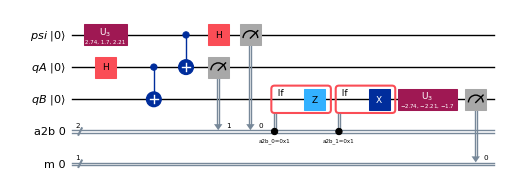

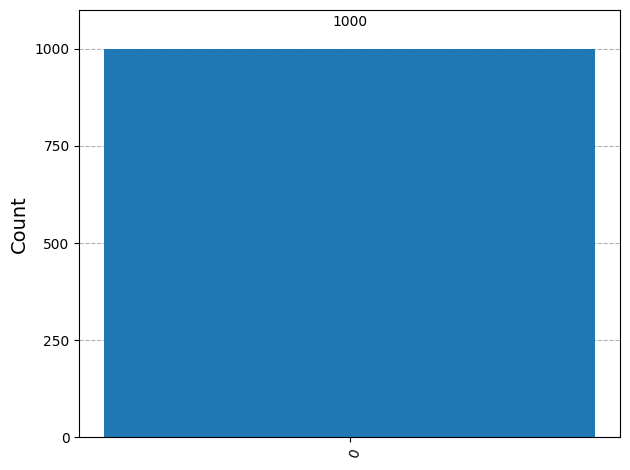

In [6]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import transpile
backend = AerSimulator()
sampler_aer = AerSampler()

m = ClassicalRegister(1, 'm')
qc00_for_sampler = qc00.copy()


qc00_for_sampler.add_register(m)
qc00_for_sampler.measure(qB, m[0])

qc00_aer = transpile(qc00_for_sampler, backend=backend)

job_aer=sampler_aer.run([qc00_aer], shots=1000)
result_aer=job_aer.result()
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.m.get_counts()
display(qc00_for_sampler.draw('mpl',scale=0.5,initial_state=True,fold=-1))
display(qc00_aer.draw('mpl',scale=0.5,initial_state=True))
display(plot_histogram(counts_aer))

## **1. Obwody kwantowe dla różnych par EPR**

**Wskazówka**. Aby uzyskać różne typy par generowanych przez Trenta, należy na wejściu `BellCircuit` umieścić różne kombinacje stanów $\ket{0}$ i $\ket{1}$. Zatem do realizacji punktów 1.2-1.4 wystarczy odpowiednia inicjalizacja kubitów `qA` i `qB`, gdy są jeszcze w posiadaniu Trenta, a następnie powtórzenie kroków z [punktu 0.4](#04-uogólnienie-na-dowolny-stan-wejściowy).

### **1.1 Para $\ket{\beta_{0,0}}$**

To już zrobiono w [punkcie 0.4](#04-uogólnienie-na-dowolny-stan-wejściowy).

### **1.2 Para $\ket{\beta_{0,1}}$**

In [7]:
def bell_subcircuit(name="BellCircuit"):
    qc = QuantumCircuit(2, name=name)
    qc.h(0)
    qc.cx(0, 1)
    return qc.to_instruction()

def bell_measurement_subcircuit(name="BellMeasurementCircuit"):
    qc = QuantumCircuit(2, name=name)
    qc.cx(0, 1)
    qc.h(0)
    return qc.to_instruction()

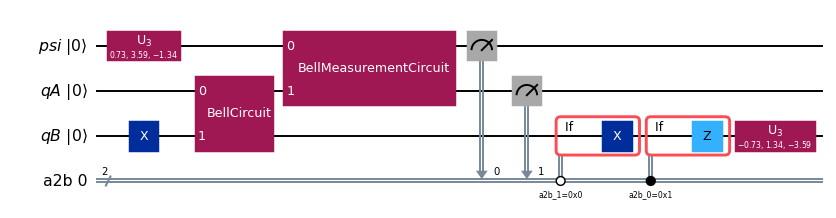

In [8]:
## Wyznacz qc01

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import U3Gate
from qiskit.synthesis import OneQubitEulerDecomposer

# Generujemy losową macierz unarną dla jednego kubitu
rand_unitary = random_unitary(2)

# Używamy OnekubitEulerDecomposer do dekompozycji do postaci U3(θ, φ, λ)
decomposer = OneQubitEulerDecomposer(basis="U3")
theta_val, phi_val, lam_val = decomposer.angles(rand_unitary)
bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')
a2b = ClassicalRegister(2, 'a2b')

qc01 = QuantumCircuit(qpsi, qA, qB, a2b)


# dowolny stan wejściowy
qc01.append(U3Gate(theta_val, phi_val, lam_val), [qpsi])
# para EPR wygenerowana przez Trenta
#qc01.barrier(label="Trent starts here")

# DODANIE BRAMKI NEGACJI NA QUBICIE B
qc01.x(qB)

qc01.append(bell_gate, [qA, qB])
# teleportacja, część Alice
#qc01.barrier(label="Alice starts here")
qc01.append(bell_measurement, [qpsi, qA])
qc01.measure(qpsi, a2b[0])
qc01.measure(qA, a2b[1])
# teleportacja, część Bob'a
#qc01.barrier(label="Bob starts here")
with qc01.if_test((a2b[1], 0)):
    qc01.x(qB)
with qc01.if_test((a2b[0], 1)):
    qc01.z(qB)
# tu powinien być dowolny stan \psi=U3(θ, φ, λ)|0>.
# Stosujemy transformację odwrotną do U3(θ, φ, λ)
# (U3(θ, φ, λ))^(-1) = U3(-θ, -λ, -φ), zwróć uwagę na na zmianę znaków i kolejność argumentów
qc01.append(U3Gate(-theta_val, -lam_val, -phi_val), [qB])

display(qc01.draw('mpl',scale=0.7,initial_state=True, fold=120))

### **1.3 Para $\ket{\beta_{1,0}}$**

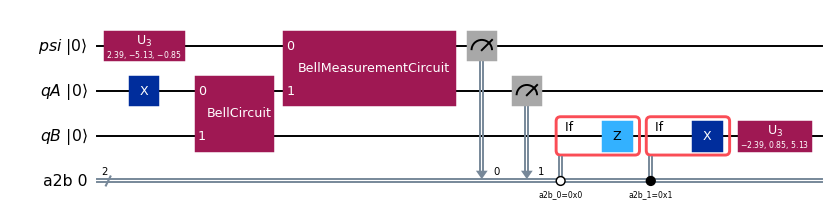

In [9]:
## Wyznacz qc10

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import U3Gate
from qiskit.synthesis import OneQubitEulerDecomposer

# Generujemy losową macierz unarną dla jednego kubitu
rand_unitary = random_unitary(2)

# Używamy OnekubitEulerDecomposer do dekompozycji do postaci U3(θ, φ, λ)
decomposer = OneQubitEulerDecomposer(basis="U3")
theta_val, phi_val, lam_val = decomposer.angles(rand_unitary)
bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')
a2b = ClassicalRegister(2, 'a2b')

qc10 = QuantumCircuit(qpsi, qA, qB, a2b)

# dowolny stan wejściowy
qc10.append(U3Gate(theta_val, phi_val, lam_val), [qpsi])
# para EPR wygenerowana przez Trenta
#qc10.barrier(label="Trent starts here")

# DODANIE BRAMKI NEGACJI NA QUBICIE A
qc10.x(qA)

qc10.append(bell_gate, [qA, qB])
# teleportacja, część Alice
#qc10.barrier(label="Alice starts here")
qc10.append(bell_measurement, [qpsi, qA])
qc10.measure(qpsi, a2b[0])
qc10.measure(qA, a2b[1])
# teleportacja, część Bob'a
#qc10.barrier(label="Bob starts here")

with qc10.if_test((a2b[0], 0)):
    qc10.z(qB)
with qc10.if_test((a2b[1], 1)):
    qc10.x(qB)

# tu powinien być dowolny stan \psi=U3(θ, φ, λ)|0>.
# Stosujemy transformację odwrotną do U3(θ, φ, λ)
# (U3(θ, φ, λ))^(-1) = U3(-θ, -λ, -φ), zwróć uwagę na na zmianę znaków i kolejność argumentów
qc10.append(U3Gate(-theta_val, -lam_val, -phi_val), [qB])

display(qc10.draw('mpl',scale=0.7,initial_state=True, fold=120))

### **1.4 Para $\ket{\beta_{1,1}}$**


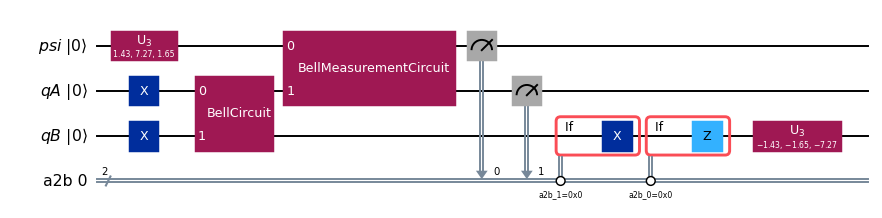

In [10]:
## Wyznacz qc11

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import U3Gate
from qiskit.synthesis import OneQubitEulerDecomposer

# Generujemy losową macierz unarną dla jednego kubitu
rand_unitary = random_unitary(2)

# Używamy OnekubitEulerDecomposer do dekompozycji do postaci U3(θ, φ, λ)
decomposer = OneQubitEulerDecomposer(basis="U3")
theta_val, phi_val, lam_val = decomposer.angles(rand_unitary)
bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')
a2b = ClassicalRegister(2, 'a2b')

qc11 = QuantumCircuit(qpsi, qA, qB, a2b)


# dowolny stan wejściowy
qc11.append(U3Gate(theta_val, phi_val, lam_val), [qpsi])
# para EPR wygenerowana przez Trenta
#qc11.barrier(label="Trent starts here")

# DODANIE BRAMKI NEGACJI NA QUBICIE A i B
qc11.x(qA)
qc11.x(qB)

qc11.append(bell_gate, [qA, qB])
# teleportacja, część Alice
#qc11.barrier(label="Alice starts here")
qc11.append(bell_measurement, [qpsi, qA])
qc11.measure(qpsi, a2b[0])
qc11.measure(qA, a2b[1])
# teleportacja, część Bob'a
#qc11.barrier(label="Bob starts here")
with qc11.if_test((a2b[1], 0)):
    qc11.x(qB)
with qc11.if_test((a2b[0], 0)):
    qc11.z(qB)
# tu powinien być dowolny stan \psi=U3(θ, φ, λ)|0>.
# Stosujemy transformację odwrotną do U3(θ, φ, λ)
# (U3(θ, φ, λ))^(-1) = U3(-θ, -λ, -φ), zwróć uwagę na na zmianę znaków i kolejność argumentów
qc11.append(U3Gate(-theta_val, -lam_val, -phi_val), [qB])

display(qc11.draw('mpl',scale=0.7,initial_state=True, fold=120))

## **2. Weryfikacja w symulatorze Aer**

Dla obwodów `qc00`, `qc01`, `qc10`, `qc11` powtórz symulację z [punktu 0.4](#04-uogólnienie-na-dowolny-stan-wejściowy). Zwróć uwagę, że w jednym uruchomieniu symulatora można symulować kilka obwodów jednocześnie, np.
```python
job_aer=sampler_aer.run([ qc00_aer, qc01_aer, qc10_aer, qc11_aer ], shots=1000)
```
We wszystkich przypadkach stanem końcowym symulacji powinien być $qA=\ket{0}$. Jeżeli tak nie jest, wprowadź do obwodów `q01`, `q10`, `q11` niezbędne modyfikacje pozwalające na uzyskanie histogramów o pożądanej postaci.

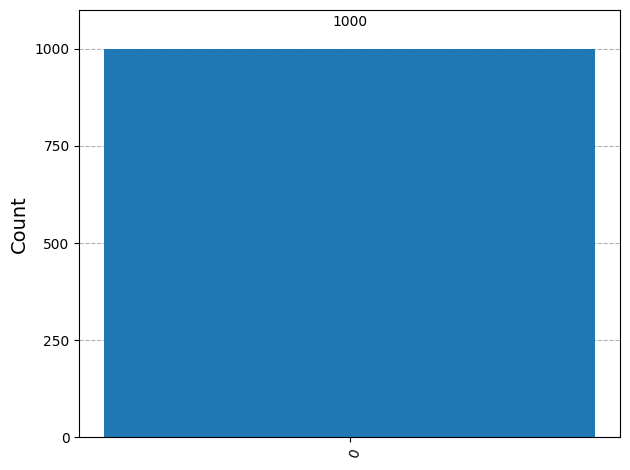

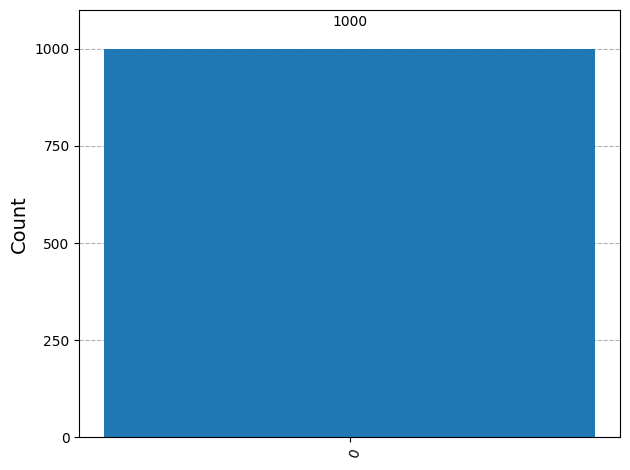

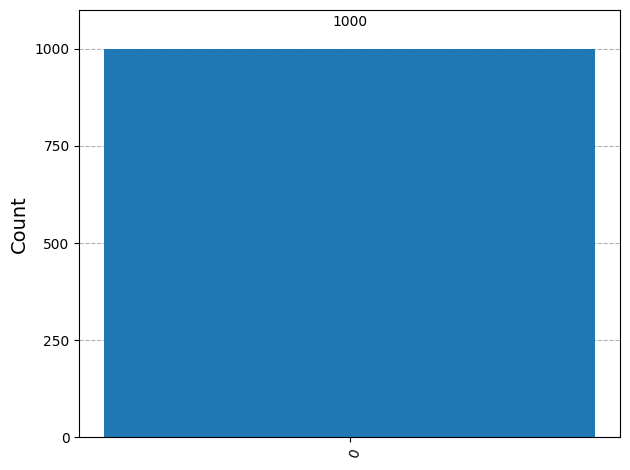

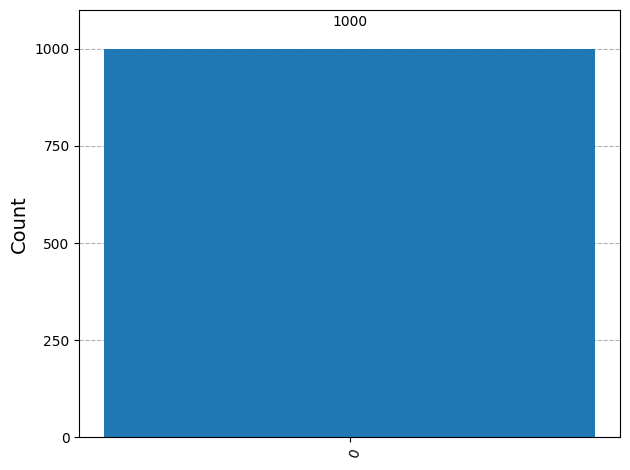

In [11]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import transpile
backend = AerSimulator()
sampler_aer = AerSampler()

m = ClassicalRegister(1, 'm')

qc00_for_sampler = qc00.copy()
qc01_for_sampler = qc01.copy()
qc10_for_sampler = qc10.copy()
qc11_for_sampler = qc11.copy()

qc00_for_sampler.add_register(m)
qc00_for_sampler.measure(qB, m[0])

qc01_for_sampler.add_register(m)
qc01_for_sampler.measure(qB, m[0])

qc10_for_sampler.add_register(m)
qc10_for_sampler.measure(qB, m[0])

qc11_for_sampler.add_register(m)
qc11_for_sampler.measure(qB, m[0])


qc00_aer = transpile(qc00_for_sampler, backend=backend)
qc01_aer = transpile(qc01_for_sampler, backend=backend)
qc10_aer = transpile(qc10_for_sampler, backend=backend)
qc11_aer = transpile(qc11_for_sampler, backend=backend)

job_aer=sampler_aer.run([ qc00_aer, qc01_aer, qc10_aer, qc11_aer ], shots=1000)

result_aer=job_aer.result()
from qiskit.visualization import plot_histogram
counts_aer_00 = result_aer[0].data.m.get_counts()
counts_aer_01 = result_aer[1].data.m.get_counts()
counts_aer_10 = result_aer[2].data.m.get_counts()
counts_aer_11 = result_aer[3].data.m.get_counts()

#display(qc01_for_sampler.draw('mpl',scale=0.5,initial_state=True,fold=-1))
#display(qc01_aer.draw('mpl',scale=0.5,initial_state=True))


display(plot_histogram(counts_aer_00))
display(plot_histogram(counts_aer_01))
display(plot_histogram(counts_aer_10))
display(plot_histogram(counts_aer_11))


## **3. Realizacja protokołu na komputerze kwantowym**

Przystosuj proces weryfikacji poprawności protokołu do uruchomienia na komputerze kwantowym. Zleć odpowiednie zadanie dla komputera kwantowego i odbierz wyniki. Podobnie jak w przypadku symulacji, zamieść uzyskane histogramy.

> **Pamiętaj!**
> Przed zleceniem zadania uruchom w katalogu projektu notatnik `store_your_ibm_token.ipynb`, co umożliwi działanie niniejszego notatnika bez konieczności umieszczania tokenu IBM w jego źródłach.




1.   Sprawdź, z której wersji Qiskit



In [12]:
import qiskit
qiskit.__version__

'2.1.0'


2.   Zainicjuj API Token dla projektu.



In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(overwrite=True,channel="ibm_quantum",token="4fc2b1e5a0a3e848e551cdfaedc25b1b028eead8ad35fd4a52a3739d1c27b545803b5c769f3df6565fcef48611dea86d6a5512dcb639f6cfeacaa244bedf55f9")



3.   Sprawdź parametry używanego konta





In [14]:
service = QiskitRuntimeService()
print("Active account:", service.active_account())

/tmp/ipython-input-14-3967526021.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


Active account: {'channel': 'ibm_quantum', 'url': 'https://auth.quantum.ibm.com/api', 'token': '4fc2b1e5a0a3e848e551cdfaedc25b1b028eead8ad35fd4a52a3739d1c27b545803b5c769f3df6565fcef48611dea86d6a5512dcb639f6cfeacaa244bedf55f9', 'verify': True, 'private_endpoint': False}




4.   Sprawdź parametry dostępnych komputerów kwantowych



In [15]:
backends = service.backends()
print("Number of backends found:", len(backends))
for backend in backends:
    print(backend.name, " num qubits:", backend.configuration().n_qubits)

Number of backends found: 2
ibm_brisbane  num qubits: 127
ibm_sherbrooke  num qubits: 127


5. Sprawdzenie najmniej zajętego komputera kwantowego IBM

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend_qpu = service.least_busy(simulator=False, operational=True)
print(backend_qpu.name, ": num qubits:", backend_qpu.configuration().n_qubits)


/tmp/ipython-input-16-2185116995.py:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


ibm_brisbane : num qubits: 127


6. Wyświetlanie wyników z obliczeń realnego komputera kwantowego

In [17]:
from qiskit_ibm_runtime import SamplerV2 as QPUSampler

sampler_qpu = QPUSampler(backend_qpu)
qc00_qpu = transpile(qc00_for_sampler, backend=backend_qpu)
qc01_qpu = transpile(qc01_for_sampler, backend=backend_qpu)
qc10_qpu = transpile(qc10_for_sampler, backend=backend_qpu)
qc11_qpu = transpile(qc11_for_sampler, backend=backend_qpu)

job_qpu = sampler_qpu.run([qc00_qpu, qc01_qpu, qc10_qpu, qc11_qpu])

print(job_qpu)


<RuntimeJobV2('d1dbdkpv3z50008ammv0', 'sampler')>


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Sprawdzenie statusu operacji

In [37]:
job_qpu.status()

'DONE'

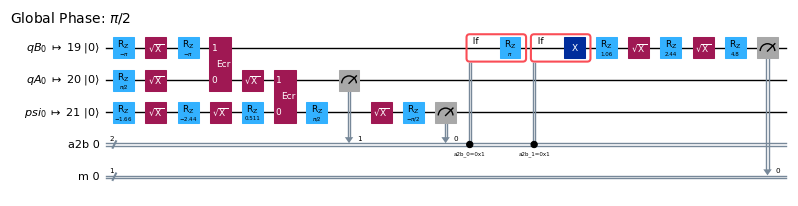

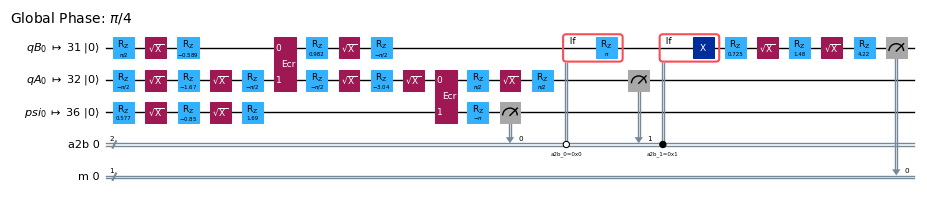

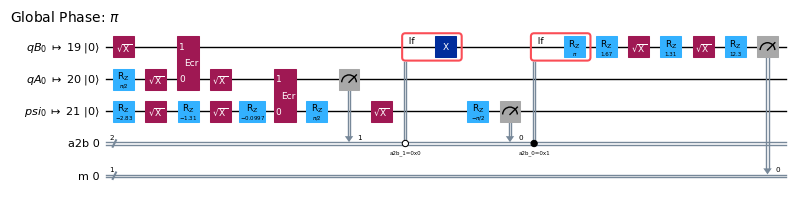

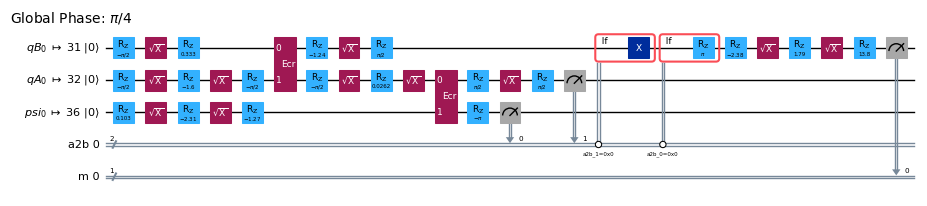

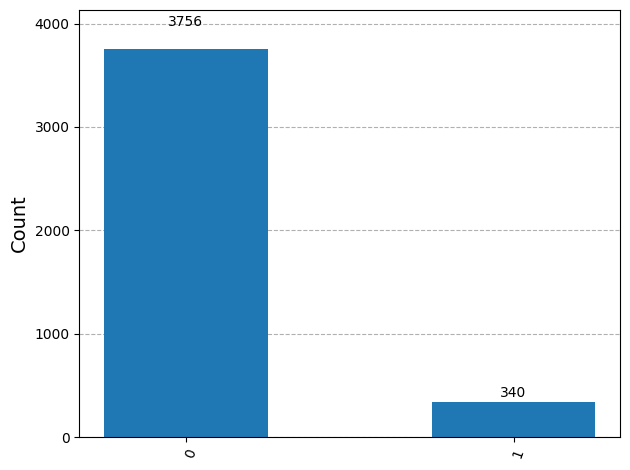

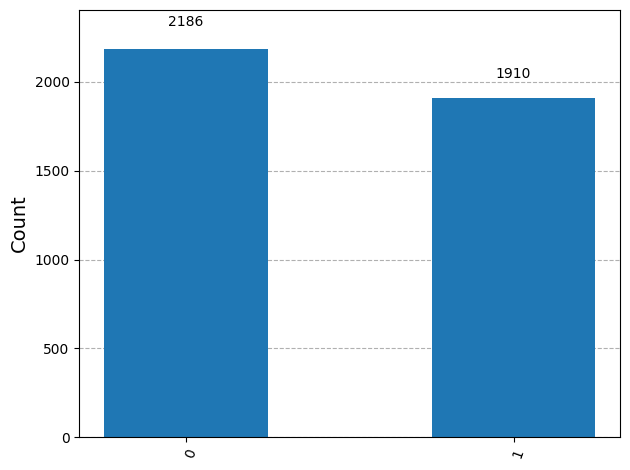

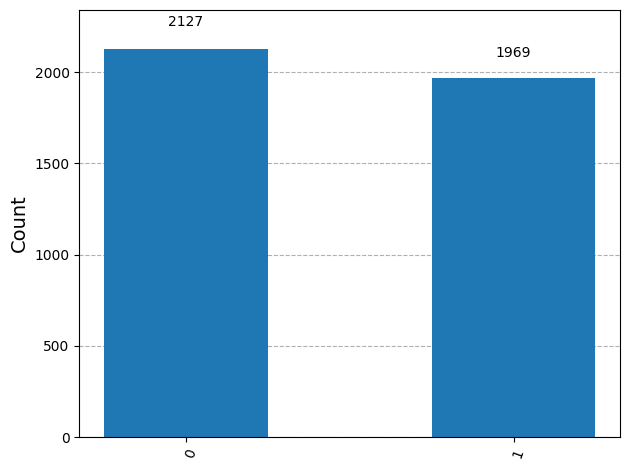

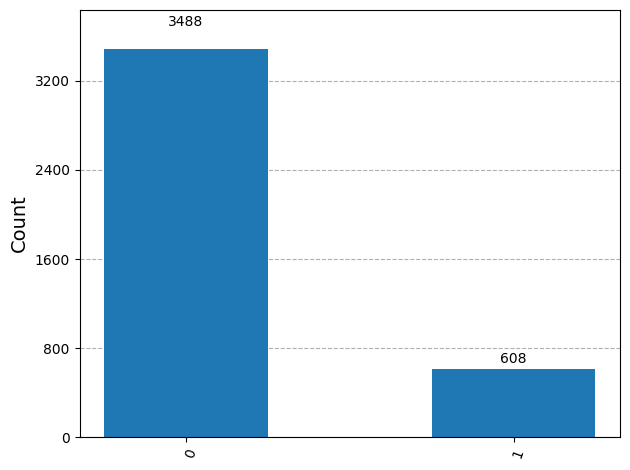

In [ ]:
result_qpu = job_qpu.result()
from qiskit.visualization import plot_histogram
counts_qpu0 = result_qpu[0].data.m.get_counts()
counts_qpu1 = result_qpu[1].data.m.get_counts()
counts_qpu2 = result_qpu[2].data.m.get_counts()
counts_qpu3 = result_qpu[3].data.m.get_counts()

display(qc00_qpu.draw('mpl', scale=0.5, initial_state=True, idle_wires=False, fold=-1))
display(qc10_qpu.draw('mpl', scale=0.5, initial_state=True, idle_wires=False, fold=-1))
display(qc01_qpu.draw('mpl', scale=0.5, initial_state=True, idle_wires=False, fold=-1))
display(qc11_qpu.draw('mpl', scale=0.5, initial_state=True, idle_wires=False, fold=-1))

display(plot_histogram(counts_qpu0))
display(plot_histogram(counts_qpu1))
display(plot_histogram(counts_qpu2))
display(plot_histogram(counts_qpu3))


## **4. Podsumowanie i wnioski**

Zamieść odpowiedzi na następujące pytania:
- Czy Alice i Bob przed wykonaniem protokołu teleportacji kwantowej muszą znać postać pary EPR, której używają do jego realizacji?

Określ, które elementy projektu były dla Ciebie najtrudniejsze, i co byś zmienił (-a) w zadaniu, aby poprawić jego walor dydaktyczny.

- Czy Alice i Bob przed wykonaniem protokołu teleportacji kwantowej muszą znać postać pary EPR, której używają do jego realizacji?

Odpowiedź:

Bazując na moim rozumieniu protokołu i zasady działania teleportacji kwantowej, wnioskuję, że Alice i Bob nie muszą znać konkretnych wartości pary EPR. Muszą jedynie między sobą ustalić jaką parę EPR używają (β00, β01, β10, β11). Jest to konieczne, aby Bob wiedział, jakich operacji użyć na bramkach (I, X, Z, XZ) w końcowym fragmencie protokołu. Dzięki tym operacjom, Bob uzyska taką wartość, jaką Alice miała na początku.

Najtrudniejszym etapem wykonywania projektu było wyznaczanie za pomocą obliczeń, jakie warunki Bob ma zastosować pod koniec protokołu dla par EPR. W moim przypadku wyniknęło to z błędów rachunkowych w operacji na '-'. Pozostała część projektu przebiegała pomyślnie i bez większych problemów. Zaskoczeniem w projekcie była obserwacja wyników przebiegu układów na realnych komputerach kwantowych IBM, wyniki nie były idealne.

Jeśli chodzi o sugestie dotyczące zmian w zadaniu w celu poprawienia jego waloru dydaktycznego, brakowało mi instrukcji w pliku projektowym co do uruchamiania układów na komputerach kwantowych, była zawarta w innym miejscu.